In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
from sqlalchemy import create_engine, inspect, func
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [26]:
engine.execute('SELECT * FROM measurement ORDER BY date DESC').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [35]:
# Find the most recent date in the data set.
r_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
#The most recent date is 2017-08-23 and the first date is 2010-01-01



('2017-08-23',)

In [34]:
engine.execute(SELECT date, prcp FROM measurement WHERE mdate>'2016-08-22').fetchall()

SyntaxError: invalid syntax (<ipython-input-34-422402e49863>, line 1)

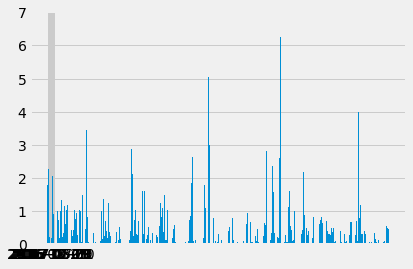

In [77]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.datetime(2016, 8, 22)
results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > recent_date).\
    order_by(measurement.date).all()

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
perc = [{"Date": result[0], "Precipitatin": result[1]} for result in results]
# Sort the dataframe by date
df = pd.DataFrame(perc)
df

# Use Pandas Plotting with Matplotlib to plot the data
x_ticks = np.arange(1,9, step=1)
tick_loc = []
for i in x_ticks:
    tick_loc.append(i)
plt.bar(df["Date"], df["Precipitatin"])
plt.xticks(np.arange(8), ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', 
                       '2017-05-31', '2017-07-10'])
plt.show()
#['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', 
#                         '2017-05-31', '2017-07-10']


In [52]:
df["Precipitatin"]

Date
2016-08-23    0.00
2016-08-23    0.15
2016-08-23    0.05
2016-08-23     NaN
2016-08-23    0.02
              ... 
2017-08-22    0.50
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.08
2017-08-23    0.45
Name: Precipitatin, Length: 2230, dtype: float64

In [75]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitatin
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [101]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# st = session.query(station.station, station.name, station.latitude, station.longitude, station.elevation).order_by(station.station)
# station_df = pd.DataFrame(st)
# station_df
st = session.query(measurement.station, measurement.prcp).order_by(measurement.station).all()
st_df = pd.DataFrame(st).dropna()
group = st_df.groupby(st_df[0])
group.nunique().sort_values(by=1, ascending=False)

,1
0,
USC00516128,260
USC00519281,194
USC00513117,149
USC00519523,140
USC00514830,115
USC00519397,98
USC00511918,77
USC00518838,76
USC00517948,51


In [102]:
engine.execute('SELECT tobs FROM measurement').fetchall()

[(65.0,),
 (63.0,),
 (74.0,),
 (76.0,),
 (73.0,),
 (70.0,),
 (64.0,),
 (68.0,),
 (73.0,),
 (64.0,),
 (61.0,),
 (66.0,),
 (65.0,),
 (68.0,),
 (64.0,),
 (72.0,),
 (66.0,),
 (66.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (76.0,),
 (68.0,),
 (72.0,),
 (70.0,),
 (67.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (64.0,),
 (69.0,),
 (73.0,),
 (73.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (71.0,),
 (61.0,),
 (69.0,),
 (63.0,),
 (64.0,),
 (65.0,),
 (67.0,),
 (68.0,),
 (65.0,),
 (76.0,),
 (75.0,),
 (66.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (75.0,),


In [108]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#sel = [measurement.tobs]
session.query(func.avg(measurement.tobs),
             func.min(measurement.tobs),
             func.max(measurement.tobs)).filter(measurement.station=='USC00516128').all()
            

[(70.91500765696784, 58.0, 84.0)]

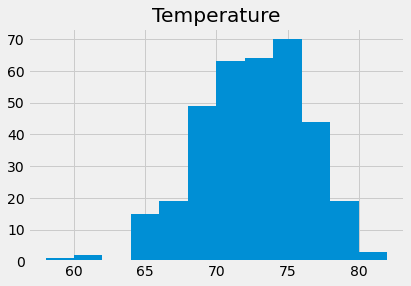

In [116]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
st_top = session.query(measurement.station, measurement.date, measurement.tobs).filter(measurement.station=='USC00516128').\
    filter(measurement.date>recent_date).all()

temp = [{"Station": result[0], "Date": result[1], "Temperature": result[2]} for result in st_top]
temp_df = pd.DataFrame(temp).dropna()
temp_df.hist(bins=12)
plt.show()

# Close session

In [117]:
# Close Session
session.close()